In [1]:
%matplotlib inline
from math import log, e
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_theme()

destDatasetPath = "../dataset/users_clean_with_indicators_no_outliers.h5"

In [2]:
%%time
dataseUsersCleanedPath = "../dataset/users_no_outliers.h5"
df_users = pd.read_hdf(dataseUsersCleanedPath)

CPU times: user 211 ms, sys: 46.5 ms, total: 258 ms
Wall time: 291 ms


In [3]:
%%time
datasetTweetsCleanedPath = "../dataset/tweets_no_outliers.h5"
df_tweets = pd.read_hdf(datasetTweetsCleanedPath)

CPU times: user 7.98 s, sys: 21.4 s, total: 29.4 s
Wall time: 30 s


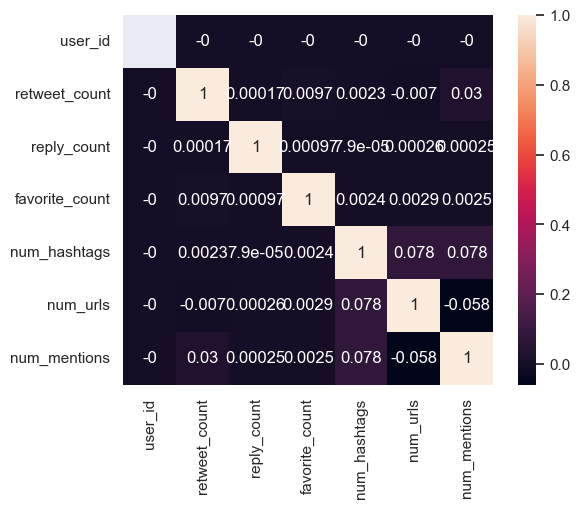

In [5]:
corr_matrix = df_tweets.corr()
fig, ax = plt.subplots()
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

## Tweet_length

In [4]:
df_tweets["tweet_length"] = df_tweets["text"].apply(lambda x: len(x))

In [6]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42
...,...,...,...,...,...,...,...,...,...,...
11712083,2.272612e+09,1,0,3,0,0,0,2019-01-27 16:01:54,c'ã¨ un momento in cui sentire ed ascoltare si...,126
11712085,8.657052e+06,0,0,1,0,0,1,2019-04-26 02:53:34,@_victoriamm twoot.,19
11712087,5.874910e+08,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ...",118
11712089,1.278956e+08,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave,48


In [5]:
def count_special_characters(text):
    counter = 0
   
    for i in range(0, len(text)):
        if (not (text[i].isalpha() or text[i].isdigit()) and text[i] != ' '):
            counter += 1
    
    return counter

## num_special_chars

In [6]:
df_tweets["num_special_chars"] = df_tweets["text"].apply(count_special_characters)

In [9]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length,num_special_chars
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64,2
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101,14
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19,1
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85,2
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42,4
...,...,...,...,...,...,...,...,...,...,...,...
11712083,2.272612e+09,1,0,3,0,0,0,2019-01-27 16:01:54,c'ã¨ un momento in cui sentire ed ascoltare si...,126,5
11712085,8.657052e+06,0,0,1,0,0,1,2019-04-26 02:53:34,@_victoriamm twoot.,19,3
11712087,5.874910e+08,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ...",118,5
11712089,1.278956e+08,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave,48,2


#### tweets_count: how many tweets were published by the user

In [7]:
df_counts = df_tweets.user_id.value_counts().to_frame("tweet_count")
df_counts

,tweet_count
-1.000000e+00,213713
4.916306e+08,3926
1.693275e+09,3906
1.570298e+08,3901
7.004532e+06,3897
...,...
1.110000e+02,1
5.512000e+03,1
1.410000e+02,1
1.373570e+09,1


In [8]:
df_users = df_users.merge(df_counts, how="inner", left_index=True, right_index=True)
df_users

,name,lang,bot,created_at,statuses_count,tweet_count
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76,120
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54,104
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3,3
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50,1275
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085,3277
...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126,1017
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024,1888
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6,6
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42,96


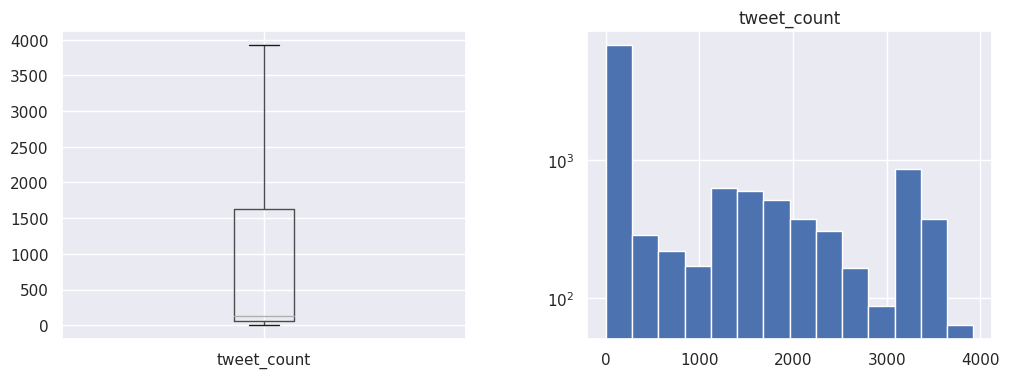

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
df_users.boxplot(column="tweet_count", ax=ax1)
df_users.hist(column="tweet_count", ax=ax2, stacked=True, bins=int(np.log2(df_users["tweet_count"].count()) + 1))
ax2.set_yscale('log')
plt.title("tweet_count")
plt.show()

Add "is_retweet" feature to the tweets dataset

In [10]:
df_tweets["is_retweet"] = df_tweets.text.str.startswith('rt @', na=False)
df_tweets.head(5)

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length,num_special_chars,is_retweet
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64,2,False
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101,14,False
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19,1,False
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85,2,False
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42,4,True


Count for each user how many retweets it has made

In [11]:
retweet_made = df_tweets.groupby(["user_id"])["is_retweet"].sum().to_frame("retweet_made")
retweet_made

,retweet_made
user_id,
-1.000000e+00,38022
0.000000e+00,2
2.000000e+00,1
3.000000e+00,0
5.000000e+00,0
...,...
4.800000e+64,0
3.300000e+66,0
4.000000e+95,0


In [12]:
df_users = df_users.merge(retweet_made, how="inner", left_index=True, right_index=True)
df_users

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_made
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76,120,0
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54,104,0
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3,3,0
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50,1275,6
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085,3277,0
...,...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126,1017,334
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024,1888,201
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6,6,0
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42,96,0


Compute ratio between retweet made and number of total tweets

In [13]:
df_users["retweet_made_ratio"] = df_users["retweet_made"]/df_users["tweet_count"]

In [14]:
df_users.describe()

,bot,statuses_count,tweet_count,retweet_made,retweet_made_ratio
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5750.093500,890.569604,164.359924,0.095118
std,0.499031,18752.596595,1163.881299,381.460515,0.169375
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,42.000000,60.750000,0.000000,0.000000
50%,1.000000,71.000000,123.000000,0.000000,0.000000
75%,1.000000,2520.250000,1622.250000,104.000000,0.125000
max,1.000000,399555.000000,3926.000000,3247.000000,1.000000


Compute average of each feature in the tweets dataset for each user

In [15]:
count_peruser = df_tweets.groupby(["user_id"]).sum()
count_peruser

/tmp/ipykernel_14697/3974280124.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  count_peruser = df_tweets.groupby(["user_id"]).sum()


,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_length,num_special_chars,is_retweet
user_id,,,,,,,,,
-1.000000e+00,96712367,200931,1188367,31965,30259,93679,15724789,1110876,38022
0.000000e+00,93,0,1,0,0,1,296,25,2
2.000000e+00,0,0,0,0,0,0,66,9,1
3.000000e+00,0,0,0,0,0,3,67,8,0
5.000000e+00,0,0,0,0,0,0,192,6,0
...,...,...,...,...,...,...,...,...,...
4.800000e+64,0,0,0,0,0,0,20,5,0
3.300000e+66,0,0,0,0,0,0,0,0,0
4.000000e+95,1,0,0,0,0,0,0,0,0


In [16]:
def add_avg_column(df, attr_count, attr, ):
    newColumnTitle = attr+"_avg"
    df[newColumnTitle] = attr_count[attr] / df["tweet_count"]

In [17]:
add_avg_column(df_users, count_peruser, "retweet_count")
add_avg_column(df_users, count_peruser, "reply_count")
add_avg_column(df_users, count_peruser, "favorite_count")
add_avg_column(df_users, count_peruser, "num_hashtags")
add_avg_column(df_users, count_peruser, "num_urls")
add_avg_column(df_users, count_peruser, "num_mentions")
add_avg_column(df_users, count_peruser, "tweet_length")
add_avg_column(df_users, count_peruser, "num_special_chars")
del count_peruser
df_users

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_made,retweet_made_ratio,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76,120,0,0.000000,0.033333,0.0,0.041667,0.108333,0.000000,0.291667,62.366667,3.958333
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54,104,0,0.000000,0.028846,0.0,0.057692,0.028846,0.000000,0.365385,69.961538,3.615385
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3,3,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,17.333333,4.333333
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50,1275,6,0.004706,0.928627,0.0,0.189020,0.083137,0.025098,0.007059,88.509804,4.814118
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085,3277,0,0.000000,0.018004,0.0,0.064693,0.131523,0.000915,0.526396,73.673482,3.671651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126,1017,334,0.328417,5956.190757,0.0,0.060964,0.216323,0.027532,0.773845,53.143559,5.085546
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024,1888,201,0.106462,416.528602,0.0,0.227225,0.129767,0.099576,0.547669,60.895127,4.360699
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6,6,0,0.000000,0.000000,0.0,0.000000,0.333333,0.666667,0.333333,67.666667,6.666667
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42,96,0,0.000000,0.072917,0.0,0.083333,0.010417,0.000000,0.395833,64.572917,3.979167


In [18]:
df_users.describe()

,bot,statuses_count,tweet_count,retweet_made,retweet_made_ratio,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5750.093500,890.569604,164.359924,0.095118,367.427349,0.387964,17.336149,0.157817,0.091054,0.363099,69.431035,5.624068
std,0.499031,18752.596595,1163.881299,381.460515,0.169375,2202.850830,8.208510,325.745417,0.231653,0.181418,0.367852,16.491180,5.605126
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,42.000000,60.750000,0.000000,0.000000,0.025316,0.000000,0.024835,0.051546,0.000000,0.011145,60.769032,3.727247
50%,1.000000,71.000000,123.000000,0.000000,0.000000,0.111111,0.000000,0.066667,0.087585,0.018420,0.322034,66.705720,4.510450
75%,1.000000,2520.250000,1622.250000,104.000000,0.125000,120.832188,0.000000,0.275772,0.173913,0.079594,0.532215,78.743056,5.722263
max,1.000000,399555.000000,3926.000000,3247.000000,1.000000,63995.214286,663.813559,12311.636364,6.419856,2.000000,5.796460,245.000000,145.500000


In [ ]:
#df_users = df_users.merge(count_peruser, how="inner", left_index=True, right_index=True)
#df_users

In [19]:
df_users.dtypes

name                             object
lang                             object
bot                               int64
created_at               datetime64[ns]
statuses_count                    int64
tweet_count                       int64
retweet_made                      int64
retweet_made_ratio              float64
retweet_count_avg               float64
reply_count_avg                 float64
favorite_count_avg              float64
num_hashtags_avg                float64
num_urls_avg                    float64
num_mentions_avg                float64
tweet_length_avg                float64
num_special_chars_avg           float64
dtype: object

In [20]:
def entropy(values, base=None):
  n_values = len(values)

  if n_values <= 1:
    return 0

  value,counts = np.unique(values, return_counts=True)
  probs = counts / n_values
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent


def get_createdat_timedelta(df):
  elapsedTimedeltaForUser = df.groupby(["user_id"])["created_at"].apply(lambda x: list(x.sort_values()))
  """ for id in elapsedTimedeltaForUser.index:
      elapsedTimedeltaForUser.loc[id].sort() """
  
  def elapsed_times(row):
    numberOfCreatedAt = len(row)
    res = []
    for i in range(numberOfCreatedAt - 1): # for each created at
        res.append(row[i+1] - row[i])
    return res
  
  return elapsedTimedeltaForUser.apply(elapsed_times)

In [31]:
elapsedTimedeltaForUser = get_createdat_timedelta(df_tweets)
elapsedTimedeltaForUser

user_id
-1.000000e+00     [1 days 12:11:21, 3 days 10:10:19, 6 days 21:3...
 0.000000e+00     [19 days 08:44:54, 115 days 23:16:29, 41 days ...
 2.000000e+00                                    [97 days 05:18:51]
 3.000000e+00               [1584 days 11:48:55, 383 days 05:51:55]
 5.000000e+00                                   [203 days 23:55:37]
                                        ...                        
 4.800000e+64                                                    []
 3.300000e+66                                                    []
 4.000000e+95                                                    []
 7.000000e+161                                                   []
 3.000000e+296                                                   []
Name: created_at, Length: 12142, dtype: object

In [22]:
def add_elapsed_time_entropy(df, timedeltas):    
    def compute_elapsed_entropy(elapsedTimedeltaList):
        elapsedTimeHours = np.zeros(len(elapsedTimedeltaList))
        for i in range(len(elapsedTimedeltaList)):
            elapsedTimeHours[i] = round(elapsedTimedeltaList[i].total_seconds() / 3600, 1)
        
        return entropy(elapsedTimeHours)
    
    elapsedTimeEntropyForUser = timedeltas.apply(compute_elapsed_entropy)    
    return df_users.merge(elapsedTimeEntropyForUser.to_frame("elapsed_time_entropy"), how="inner", left_index=True, right_index=True)

In [23]:
df_users = add_elapsed_time_entropy(df_tweets, elapsedTimedeltaForUser)
df_users.head(5)

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_made,retweet_made_ratio,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg,elapsed_time_entropy
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76,120,0,0.000000,0.033333,0.0,0.041667,0.108333,0.000000,0.291667,62.366667,3.958333,1.364257
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54,104,0,0.000000,0.028846,0.0,0.057692,0.028846,0.000000,0.365385,69.961538,3.615385,1.335474
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3,3,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,17.333333,4.333333,0.693147
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50,1275,6,0.004706,0.928627,0.0,0.189020,0.083137,0.025098,0.007059,88.509804,4.814118,4.130876
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085,3277,0,0.000000,0.018004,0.0,0.064693,0.131523,0.000915,0.526396,73.673482,3.671651,2.868727


In [24]:
df_users.elapsed_time_entropy = df_users.elapsed_time_entropy.astype(np.float64)
df_users.dtypes

name                             object
lang                             object
bot                               int64
created_at               datetime64[ns]
statuses_count                    int64
tweet_count                       int64
retweet_made                      int64
retweet_made_ratio              float64
retweet_count_avg               float64
reply_count_avg                 float64
favorite_count_avg              float64
num_hashtags_avg                float64
num_urls_avg                    float64
num_mentions_avg                float64
tweet_length_avg                float64
num_special_chars_avg           float64
elapsed_time_entropy            float64
dtype: object

In [32]:
elapsed_time_avg = elapsedTimedeltaForUser.apply(lambda x: np.mean(x)).to_frame("elapsed_time_avg")
elapsed_time_avg

/home/dferraro/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,elapsed_time_avg
user_id,
-1.000000e+00,0 days 00:15:33.979851388
0.000000e+00,40 days 01:47:43.800000
2.000000e+00,97 days 05:18:51
3.000000e+00,983 days 20:50:25
5.000000e+00,203 days 23:55:37
...,...
4.800000e+64,NaT
3.300000e+66,NaT
4.000000e+95,NaT


In [29]:
del elapsedTimedeltaForUser

In [ ]:
#df_users = df_users.merge(elapsed_time_avg, how="inner", left_index=True, right_index=True)

In [ ]:
""" elapsedHoursForUser = userGroup.copy()
elapsedMsForUser = userGroup.copy()

for id in userGroup.index: # for each user id
    createdAtList = userGroup.loc[id] # list of the sorted created_at values of the user
    numberOfCreatedAt = len(createdAtList)
    
    # init the arrays of the elapsed times to zeroes
    elapsedHoursForUser.loc[id] = np.zeros(numberOfCreatedAt - 1)
    elapsedMsForUser.loc[id] = np.zeros(numberOfCreatedAt - 1)
    
    for i in range(numberOfCreatedAt - 1): # for each created at
        # elapsed time between this tweet and the next one
        elapsedHours = (createdAtList[i+1] - createdAtList[i]).total_seconds() / 3600
        elapsedMilliseconds = (createdAtList[i+1] - createdAtList[i]).total_seconds() / 1000
        # update the list of the elapsed times for the current user
        elapsedHoursForUser.loc[id][i] = round(elapsedHours, 1)
        elapsedMsForUser.loc[id][i] = round(elapsedMilliseconds, 1) """

In [33]:
def compute_entropy(tweets, column):
    new_column_name = column+"_entropy"
    new_column = tweets.groupby(['user_id'])[column].apply(entropy).to_frame(new_column_name)
    new_column.fillna(0, inplace=True)
    return df_users.merge(new_column, how="inner", left_index=True, right_index=True)

In [34]:
df_users = compute_entropy(df_tweets, "retweet_count")
df_users = compute_entropy(df_tweets, "reply_count")
df_users = compute_entropy(df_tweets, "favorite_count")
df_users = compute_entropy(df_tweets, "num_hashtags")
df_users = compute_entropy(df_tweets, "num_urls")
df_users = compute_entropy(df_tweets, "num_mentions")
df_users = compute_entropy(df_tweets, "tweet_length")
df_users = compute_entropy(df_tweets, "num_special_chars")

In [35]:
df_users.head(5)

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_made,retweet_made_ratio,retweet_count_avg,reply_count_avg,...,num_special_chars_avg,elapsed_time_entropy,retweet_count_entropy,reply_count_entropy,favorite_count_entropy,num_hashtags_entropy,num_urls_entropy,num_mentions_entropy,tweet_length_entropy,num_special_chars_entropy
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76,120,0,0.000000,0.033333,0.0,...,3.958333,1.364257,0.146145,0.0,0.173205,0.304947,0.000000,0.603637,4.274598,2.197449
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54,104,0,0.000000,0.028846,0.0,...,3.615385,1.335474,0.130708,0.0,0.220570,0.130708,0.000000,0.656454,4.129301,2.198832
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3,3,0,0.000000,0.000000,0.0,...,4.333333,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.098612,1.098612
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50,1275,6,0.004706,0.928627,0.0,...,4.814118,4.130876,0.286464,0.0,0.508540,0.252911,0.117266,0.036302,4.686233,2.533116
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085,3277,0,0.000000,0.018004,0.0,...,3.671651,2.868727,0.089035,0.0,0.243648,0.402308,0.007320,0.873255,4.765100,2.091581


In [36]:
df_users.dtypes

name                                 object
lang                                 object
bot                                   int64
created_at                   datetime64[ns]
statuses_count                        int64
tweet_count                           int64
retweet_made                          int64
retweet_made_ratio                  float64
retweet_count_avg                   float64
reply_count_avg                     float64
favorite_count_avg                  float64
num_hashtags_avg                    float64
num_urls_avg                        float64
num_mentions_avg                    float64
tweet_length_avg                    float64
num_special_chars_avg               float64
elapsed_time_entropy                float64
retweet_count_entropy               float64
reply_count_entropy                 float64
favorite_count_entropy              float64
num_hashtags_entropy                float64
num_urls_entropy                    float64
num_mentions_entropy            

## Correlation matrix

/tmp/ipykernel_14697/2433883116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_users.corr()


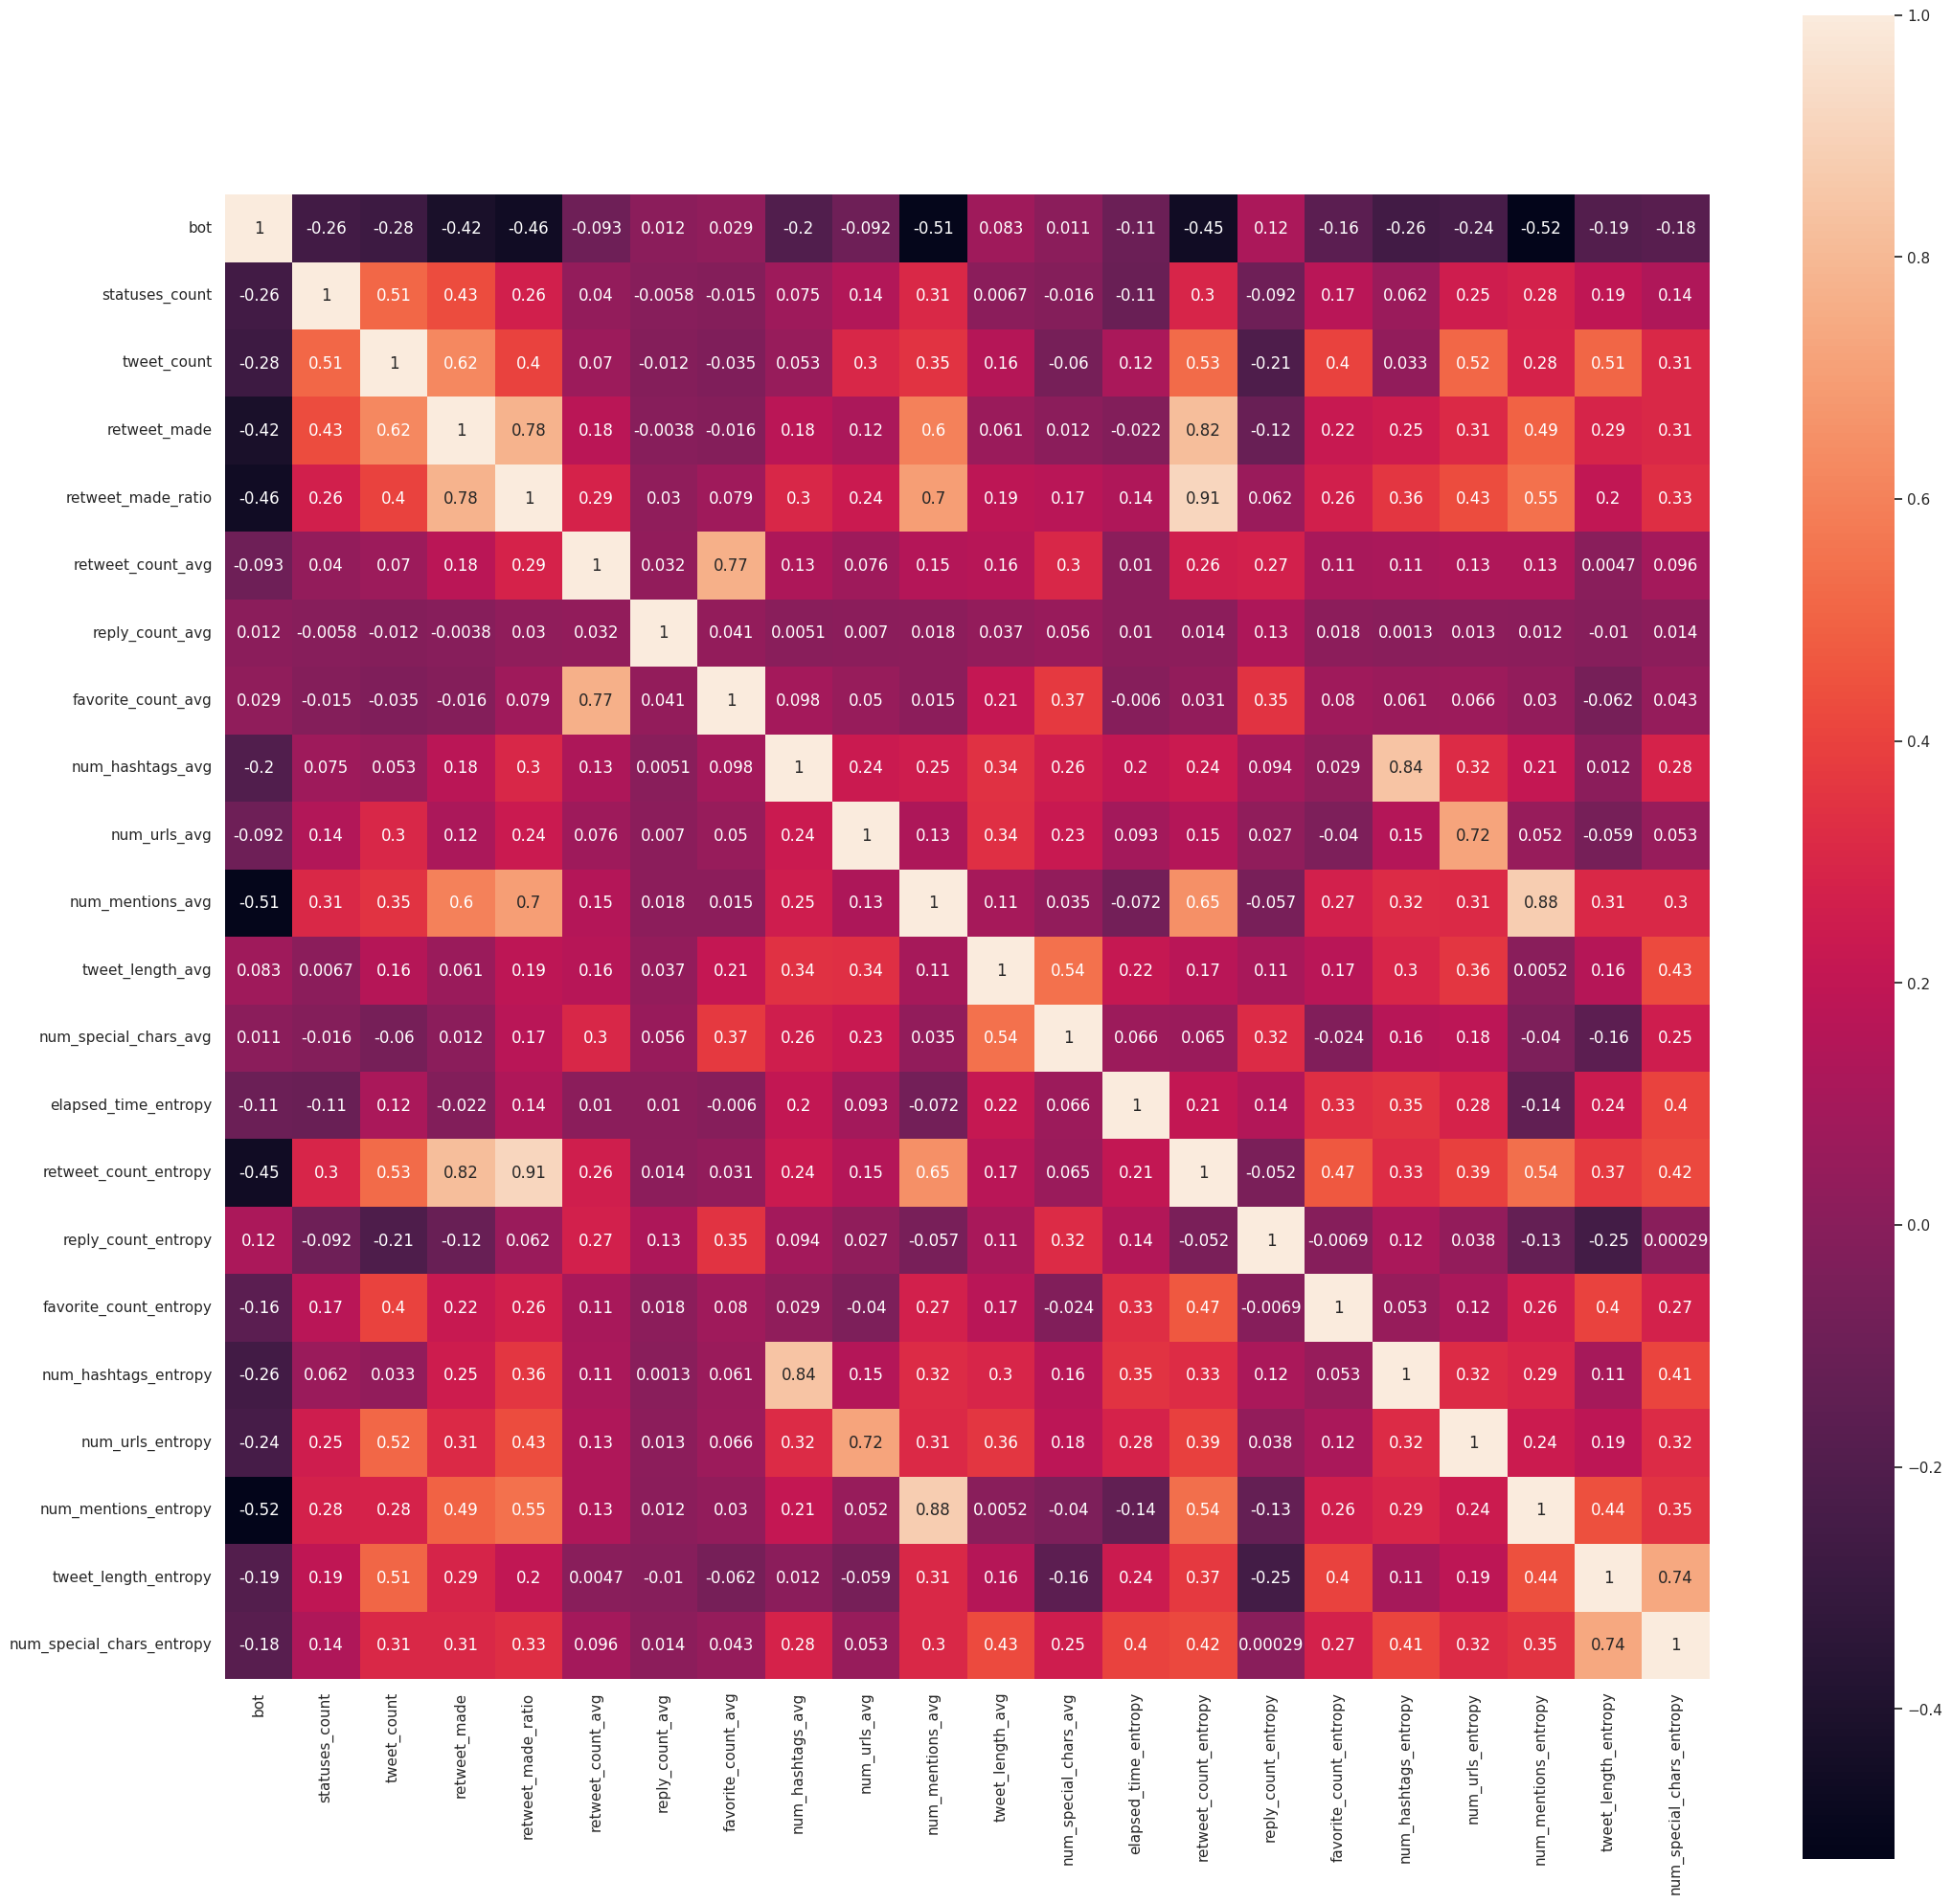

In [37]:
corr_matrix = df_users.corr()
fig, ax = plt.subplots(figsize=(25, 25))
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

In [38]:
for i in range(corr_matrix.shape[1]):
    for j in range(i):
        if abs(corr_matrix.iat[i, j]) > 0.7:
            print(corr_matrix.columns[i], " - ", corr_matrix.columns[j], " - ", corr_matrix.iat[i, j])

retweet_made_ratio  -  retweet_made  -  0.7796537589373866
favorite_count_avg  -  retweet_count_avg  -  0.7674588091192018
retweet_count_entropy  -  retweet_made  -  0.8166859476985839
retweet_count_entropy  -  retweet_made_ratio  -  0.9114245198053188
num_hashtags_entropy  -  num_hashtags_avg  -  0.8420440327217591
num_urls_entropy  -  num_urls_avg  -  0.7239777040983861
num_mentions_entropy  -  num_mentions_avg  -  0.8767947240011044
num_special_chars_entropy  -  tweet_length_entropy  -  0.7373967128769426


In [39]:
del df_users["retweet_count_entropy"]
del df_users["retweet_count_avg"]
del df_users["num_special_chars_entropy"]

# Save to file

In [40]:
df_users.to_hdf(destDatasetPath, 'df_users', mode='w')

/tmp/ipykernel_14697/3894006160.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_users.corr()


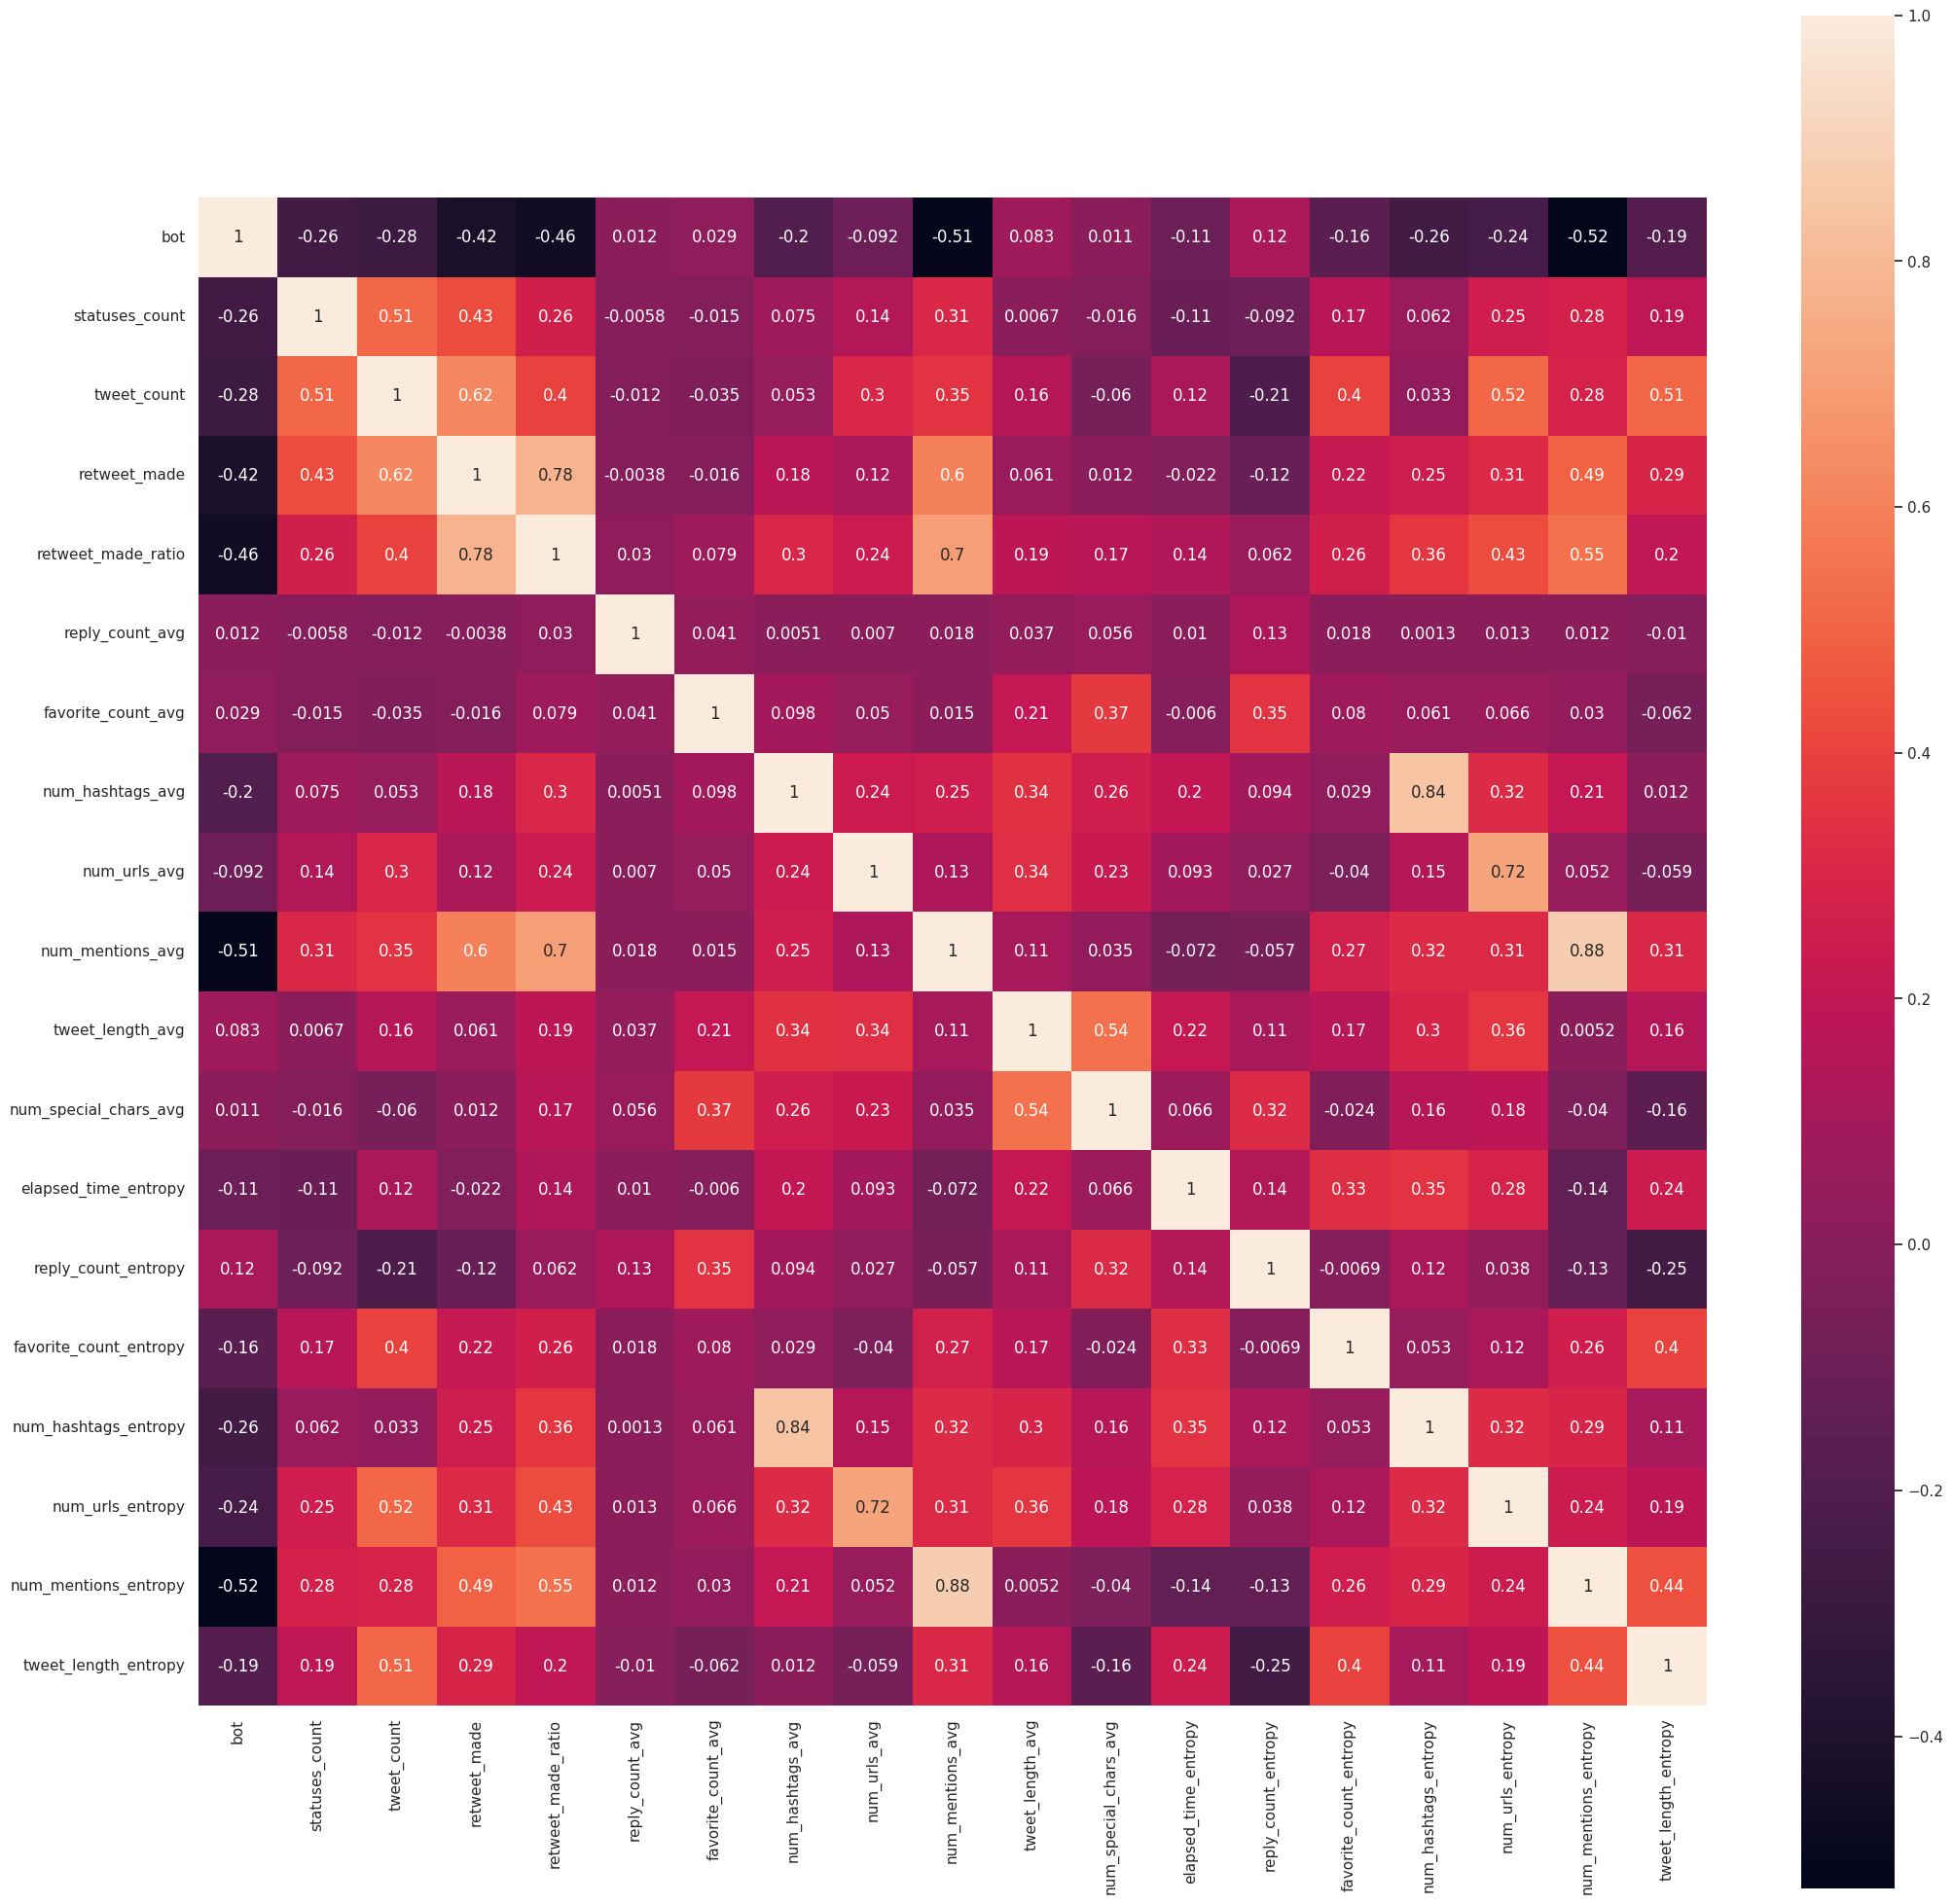

In [41]:
corr_matrix = df_users.corr()
fig, ax = plt.subplots(figsize=(25, 25))
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.savefig("../images/correlation_matrix_with_new_indicators")
plt.show()